In [1]:
from opyenxes.model.XLog import XLog
from opyenxes.data_in.XUniversalParser import XUniversalParser
from opyenxes.classification.XEventAttributeClassifier import XEventAttributeClassifier
from bokeh.plotting import figure, output_file, show
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bpic_2011_path = "../logs/bpic2011.xes"

with open(bpic_2011_path) as bpic2011_file:
    bpic2011_rlog = XUniversalParser().parse(bpic2011_file)

Unknown extension: http://www.xes-standard.org/meta_time.xesext
Unknown extension: http://www.xes-standard.org/meta_life.xesext
Unknown extension: http://www.xes-standard.org/meta_org.xesext
Unknown extension: http://www.xes-standard.org/meta_concept.xesext
Unknown extension: http://www.xes-standard.org/meta_3TU.xesext
Unknown extension: http://www.xes-standard.org/meta_general.xesext


In [3]:
bpic2011_log = bpic2011_rlog[0] # the rest of this array is empty anyway as len(bpic2011_rlog) == 1
raw_trace = bpic2011_log[0]
raw_event = raw_trace[0]
raw_attributes = raw_event.get_attributes()

## Attributes of the first event of the first trace

In [4]:
for attribute in raw_attributes:
    attribute = raw_attributes[attribute]
    print(attribute.get_key(), "=", attribute.get_value())

org:group = Radiotherapy
Number of executions = 1
Specialism code = 61
concept:name = 1e consult poliklinisch
Producer code = SRTH
Section = Section 5
Activity code = 410100
time:timestamp = 2005-01-03 00:00:00+01:00
lifecycle:transition = complete


## All attributes of the first trace and their occurence along it

In [5]:
# collect all attributes
attribute_list = []

for event in raw_trace:
    event_attributes = event.get_attributes()
    
    for attribute in event_attributes:
        attribute_list.append(attribute)
        
attribute_list = set(attribute_list) # remove duplicates

event_indices = range(0,len(raw_trace))
attribute_labels = attribute_list
attribute_dict = {attr:[] for attr in attribute_list}

trace_df = pd.DataFrame(columns=attribute_labels, index=event_indices)

for event_idx,event in enumerate(raw_trace):
    event_attributes = event.get_attributes()
    for attribute in event_attributes:
        trace_df.iloc[event_idx][attribute] = event_attributes[attribute].get_value()

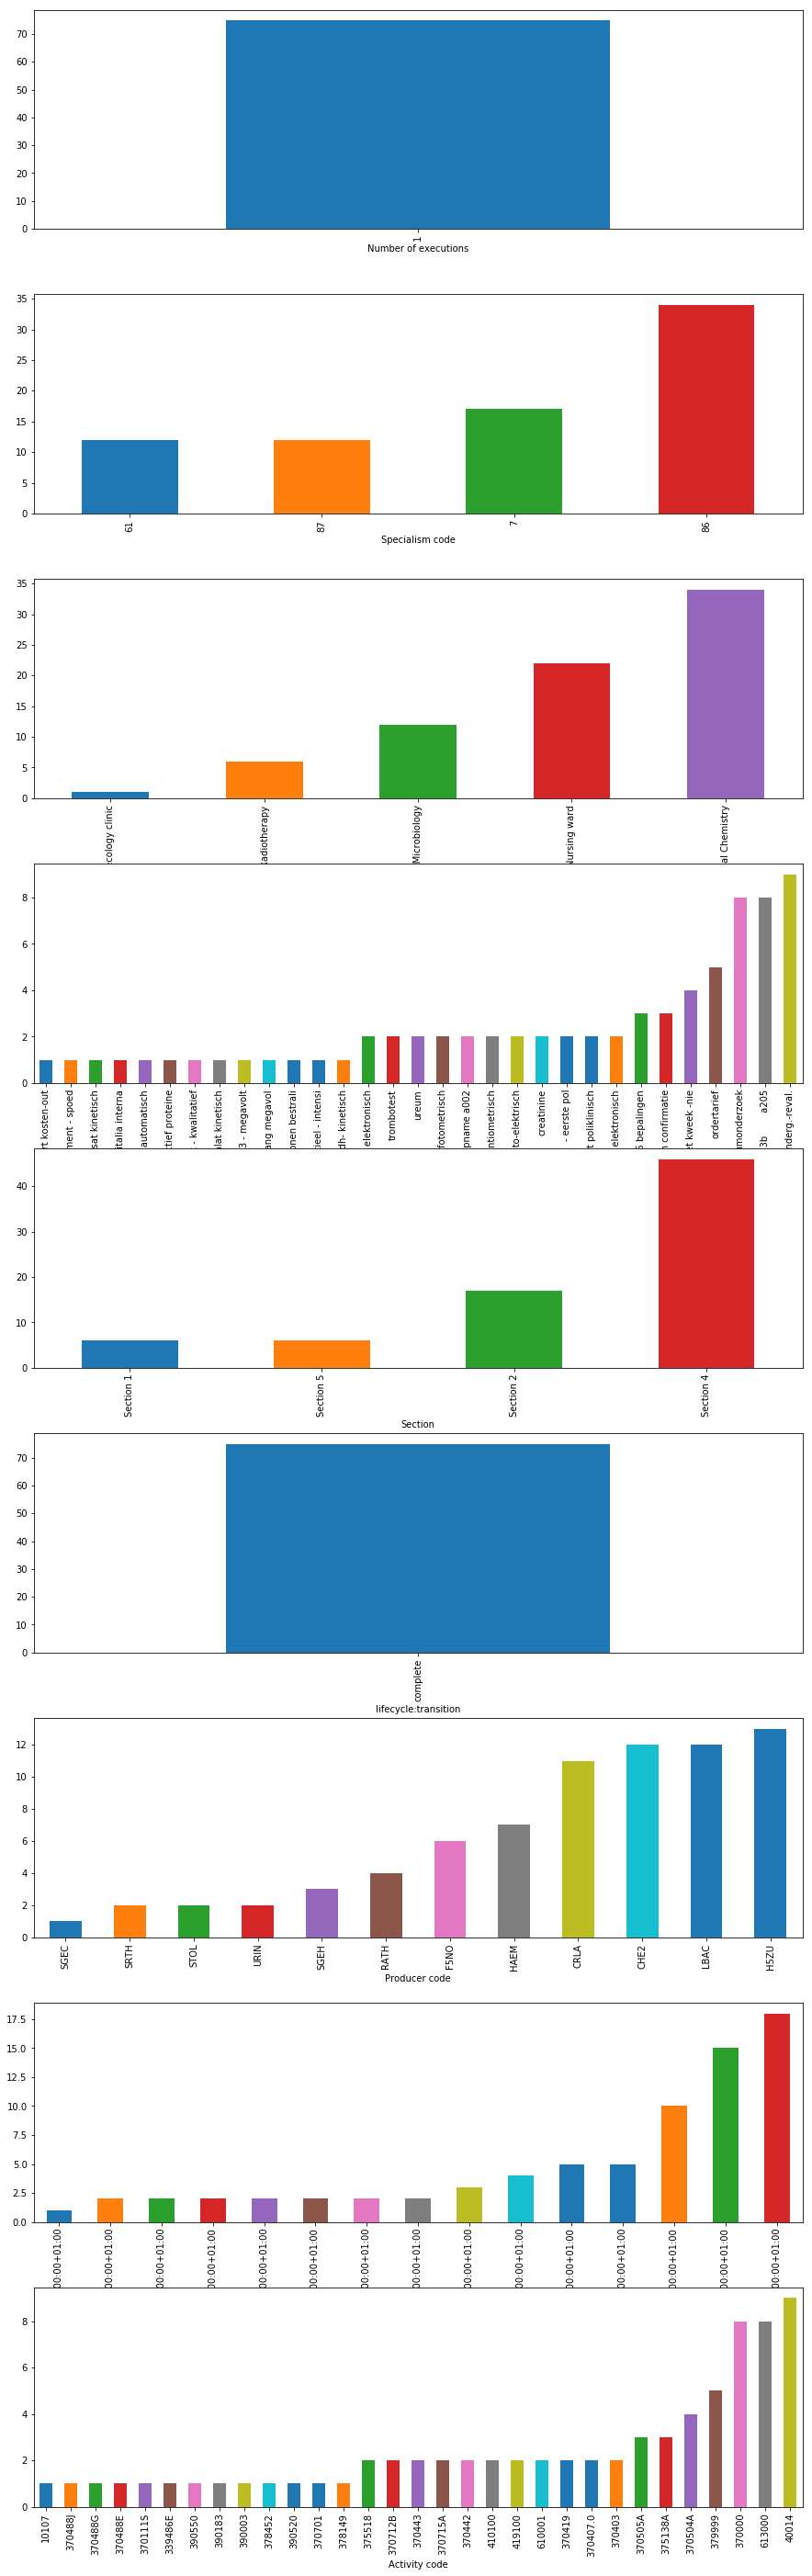

In [7]:
fig, axs = plt.subplots(9,1, figsize=(15,50))

for idx, attr in enumerate(attribute_list):
    trace_df.groupby(attr).size().sort_values().plot(kind='bar', ax=axs[idx])
    
#fig.tight_layout()
fig.subplots_adjust(hspace=0.3)

In [12]:
# Test prefixspan here
from prefixspan import PrefixSpan
import itertools

event_sequences = [[ ev.get_attributes()["concept:name"].get_value() for ev in trace ] for trace in bpic2011_log ]
combined_traces = list(itertools.chain.from_iterable(event_sequences))
events = sorted(list(set(combined_traces)))
event_to_int = dict((c, i) for i, c in enumerate(events))

translated_sequences = [ [event_to_int[ev] for ev in trace] for trace in event_sequences]

ps = PrefixSpan(translated_sequences)

In [ ]:
ps_topkc = ps.topk(10, closed=True)
ps_topk  = ps.topk(10)
#ps_topkg = ps.topk(10, generator=True)
#ps_freq2 = ps.frequent(2)
#ps_freq3 = ps.frequent(3)
ps_freq4 = ps.frequent(4)

In [20]:
print("Top 10 closed prefixes")
for p in ps_topk: print(p)

print("\nTop 10 prefixes")
for p in ps_topk:  print(p)
    
#print("\nTop 10 generator prefixes")
#for p in ps_topg:  print(p)

print("\nLength 2 prefixes")
#for p in ps_freq2: print(p)
    
print("\nLength 3 prefixes")
#for p in ps_freq3: print(p)
    
print("\nLength 4 prefixes")
for p in ps_freq4: print(p)

Top 10 closed prefixes
(1110, [16])
(958, [578])
(839, [16, 578])
(804, [12, 438])
(765, [12, 12, 438])
(760, [578, 578])
(729, [12, 301, 438])
(723, [12, 12, 301, 438])
(723, [12, 438, 16])
(709, [12, 154, 438])

Top 10 prefixes
(1110, [16])
(958, [578])
(839, [16, 578])
(804, [12])
(804, [12, 438])
(804, [438])
(765, [12, 12])
(765, [12, 12, 438])
(760, [578, 578])
(729, [12, 301, 438])

Length 3 prefixes


NameError: name 'ps_freq3' is not defined